### Student Information
Name: Catherine Tao

Student ID: X1140008

GitHub ID: sleepingpandazzz25

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [262]:
# Import

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
import helpers.data_mining_helpers as dmh

nltk.download("punkt")

# Get data from CSV
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
# Only keep text, label, subjectivity, and polarity 
df = df[["text", "label", "subjectivity", "polarity", "datetime", "subreddit"]].copy()

# Log first 5 elements
df.head(50)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/catherinetao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,label,subjectivity,polarity,datetime,subreddit
0,Calls on retards,-1.0,1.000000,-0.900000,2025-04-11 17:29:56,wallstreetbets
1,Stunt as in like why did they even make a big ...,0.0,0.177778,0.083333,2025-04-12 1:12:19,wallstreetbets
2,Seeing lots of red in the ticker.,0.0,0.000000,0.000000,2025-04-10 15:09:41,StockMarket
3,Vision Marine Technologies Inc. is rewriting t...,1.0,0.646970,0.216383,2023-08-30 17:12:55,stockstobuytoday
4,He didn’t say thank you.,-1.0,0.000000,0.000000,2025-04-11 14:48:05,StockMarket
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,0.500000,0.250000,2025-04-12 2:19:03,wallstreetbets
6,Trump will respond to china increasing their t...,-1.0,0.380000,-0.108333,2025-04-11 12:37:23,stocks
7,Confirmed not a trap. Its been like this for p...,0.0,0.700000,0.050000,2025-04-11 17:28:50,wallstreetbets
8,Am I the only one seeing the cup & handle brea...,1.0,0.491818,0.057045,2021-02-01 15:36:32,stocks
9,HLGN is $10. Hurry and catch it now before it ...,1.0,0.000000,0.000000,2021-12-31 16:29:49,stockstobuytoday


In [263]:
# Drop duplicates
print("Number of duplicates before: " + str(sum(df.duplicated())))
df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
print("Number of duplicates before: " + str(sum(df.duplicated())))


Number of duplicates before: 0
Number of duplicates before: 0


In [264]:
# Exercise 1
for t in df["text"][:3]:
    print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Seeing lots of red in the ticker.


In [265]:
# Exercise 2
df.iloc[1:5, -1]

1      wallstreetbets
2         StockMarket
3    stockstobuytoday
4         StockMarket
Name: subreddit, dtype: object

In [266]:
# Exercise 3
# Get all records that have label 1.0
records = df[df['label'] == 1.0]
records.iloc[::10].iloc[:5] # first get every 10th record which gives a list, then get the first 5 of the list


,text,label,subjectivity,polarity,datetime,subreddit
3,Vision Marine Technologies Inc. is rewriting t...,1.0,0.646970,0.216383,2023-08-30 17:12:55,stockstobuytoday
78,I think it’s gonna work itself out. I bought t...,1.0,0.133333,-0.133333,2025-04-11 15:11:59,StockMarket
168,The obvious can also be refreshing from CNBC: ...,1.0,0.750000,0.250000,2025-04-11 13:09:51,stocks
219,Same. Back to break even after that last rip b...,1.0,0.300000,0.144444,2023-08-12 2:20:58,stockstobuytoday
319,Etrade has a feed of news articles about how r...,1.0,0.000000,0.000000,2021-02-01 14:44:17,stocks


In [267]:
# Exercise 4
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [268]:
# Exercise 5
# The same logic as Exercise 5 in Phase 1 Part 1 would hold.

# Exercise 6
# The same logic as Exercise 6 in Phase 1 Part 1 would hold.

<Axes: title={'center': 'Sentiment Distribution (Raw)'}, xlabel='label'>

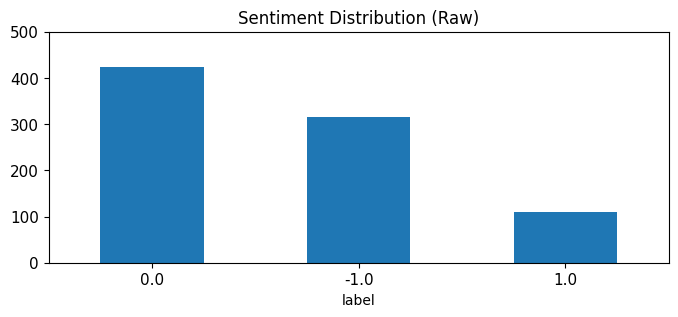

In [269]:
# Exercise 7
import math

maximum_count = df["label"].value_counts().max()
maximum_count_rounded = math.ceil(maximum_count / 100) * 100

# Plot bar chart for label distribution with raw labels (0,0, -1,0, 1.0)
df.label.value_counts().plot(
    kind="bar",
    title="Sentiment Distribution (Raw)",
    ylim=[0, maximum_count_rounded],
    rot=0, fontsize=11, figsize=(8,3),
)



<Axes: title={'center': 'Sentiment Distribution'}, xlabel='label_name'>

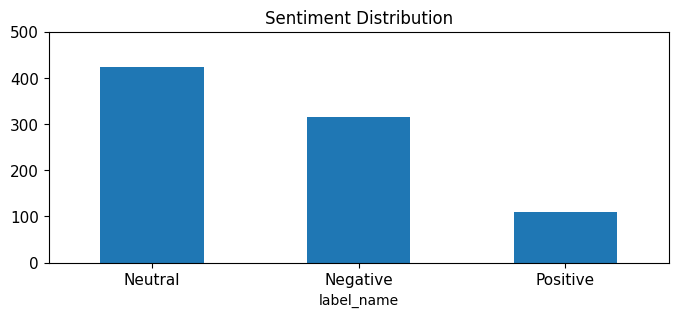

In [270]:
# Exercise 7
# Add a column that maps each label to its sentiment
label_dict = {-1.0: "Negative", 0.0: "Neutral", 1.0: "Positive"}
df["label_name"] = df["label"].map(label_dict)

# Plot bar chart for label distribution with label names
df.label_name.value_counts().plot(
    kind="bar",
    title="Sentiment Distribution",
    ylim=[0, maximum_count_rounded],
    rot=0, fontsize=11, figsize=(8,3),
)

<Axes: title={'center': 'Category distribution'}, xlabel='label_name'>

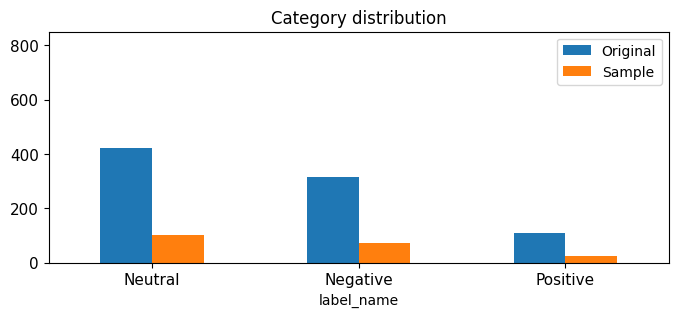

In [271]:
# Exercise 8
df_sample = df.sample(n=200) 
# Combine the two dataframes into one
combined = pd.DataFrame({
    'Original': df.label_name.value_counts(),
    'Sample': df_sample.label_name.value_counts() 
})

maximum_count = max(combined.max())
maximum_count_rounded = math.ceil(maximum_count / 100) * 100

combined.plot(kind='bar',
              title='Category distribution',
              ylim=[0, 850], # Set ylim as 850 so the legend doesn't cover any bars
              rot=0, fontsize=11, figsize=(8,3))

In [272]:
# Exercise 9
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text)
analyze = count_vect.build_analyzer()
analyze(df["text"].iloc[0]) # We get the first text document and then call analyze

['calls', 'on', 'retards']

In [273]:
# Exercise 10
# There are no codes for each word so I'm skipping 10

<Axes: >

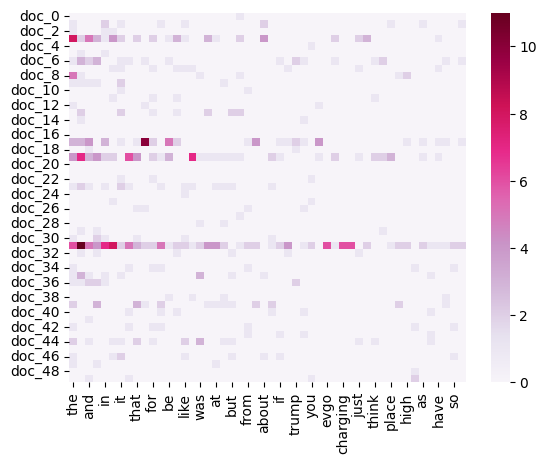

In [274]:
# First 50 reddit posts
documents = df_counts[0:50, :].toarray()

# Compute term frequencies
term_frequency = documents.sum(axis=0)

# Top 50 frequent terms
top_terms_index = term_frequency.argsort()[-50:][::-1]

plot_x = [count_vect.get_feature_names_out()[i] for i in top_terms_index]
plot_y = ["doc_"+ str(i) for i in range(documents.shape[0])]
plot_z = documents[:, top_terms_index]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=plot_z.max())


In [275]:
# Exercise 12
import plotly.express as pltly

# Calculate term frequencies the same way as part 1
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(df_counts[:, j].sum())

pltly.bar(
    x=count_vect.get_feature_names_out()[:300], 
    y=term_frequencies[:300],
    labels={'x':'Word', 'y':'Frequency'},
    title='Interactive Visualization of Word Frequency'
)


In [276]:
# Exercise 13
# I'll get the first 30 terms alphabetically.
n = 30 # Select first 30 terms for visualization
terms_freq = list(zip(count_vect.get_feature_names_out(), term_frequencies)) # Zip terms and frequencies together so they're treated as a group
terms_freq.sort(key=lambda x: x[0]) # Sort alphabetically
top_n_terms_freq = terms_freq[:n] # Only keep the first n terms
terms, frequencies = zip(*top_n_terms_freq) # Unzip the terms and frequencies so they're no longer grouped

pltly.bar(
    x=terms, 
    y=frequencies, 
    labels={'x':'Word', 'y':'Frequency'},
    title='Interactive Visualization of the First ' + str(n) + ' Words Alphabetically Sorted'
)

In [277]:
# Exercise 13 part 2
# I'll get the last 30 terms alphabetically.
n = 30 # Select last 30 terms for visualization
terms_freq = list(zip(count_vect.get_feature_names_out(), term_frequencies)) # Zip terms and frequencies together so they're treated as a group
terms_freq.sort(key=lambda x: x[0]) # Sort alphabetically
top_n_terms_freq = terms_freq[-n:]  # Only keep the last n terms
terms, frequencies = zip(*top_n_terms_freq) # Unzip the terms and frequencies so they're no longer grouped

pltly.bar(
    x=terms, 
    y=frequencies, 
    labels={'x':'Word', 'y':'Frequency'},
    title='Interactive Visualization of the Last ' + str(n) + ' Words Alphabetically Sorted'
)

In [278]:
# Exercise 14
n = 30 # Select top 30 terms for visualization
terms_freq = list(zip(count_vect.get_feature_names_out(), term_frequencies)) # Zip terms and frequencies together so they're treated as a group
terms_freq.sort(key=lambda x: x[1], reverse=True) # Sort by descending frequency
top_n_terms_freq = terms_freq[:n] # Only keep the top n terms
terms, frequencies = zip(*top_n_terms_freq) # Unzip the terms and frequencies so they're no longer grouped

pltly.bar(
    x=terms, 
    y=frequencies, 
    labels={'x':'Word', 'y':'Frequency'},
    title='Interactive Visualization of the Top ' + str(n) + ' Most Frequent Words in Descending Order'
)

In [279]:
# Exercise 15
n = 200 # Select top 30 terms for visualization
term_frequencies_log = [math.log(i) for i in term_frequencies]
terms_freq = list(zip(count_vect.get_feature_names_out(), term_frequencies_log)) # Zip terms and frequencies together so they're treated as a group
terms_freq.sort(key=lambda x: x[1], reverse=True) # Sort by descending frequency
top_n_terms_freq = terms_freq[:n] # Only keep the top n terms
terms, frequencies = zip(*top_n_terms_freq) # Unzip the terms and frequencies so they're no longer grouped

pltly.bar(
    x=terms, 
    y=frequencies, 
    labels={'x':'Term', 'y':'Frequency'},
    title='Interactive Visualization of the Top ' + str(n) + ' Most Frequent Terms in Descending Order (Log)'
)

# The difference between the first and second bar in the previous graph is a lot more obvious than this graph. This makes sense because the most 
# frequent term (the first bar) is less than double the frequency of the second term (the second bar), so when you take the base 2 log, the
# difference is minimal. With this observation, we can see that the long tail is a lot less obvious in this graph, since all of the bars
# are very similar in height, so it's less skewed. On the other hand, the tail in the previous graph was very obvious and a big feature of the 
# graph. Also, compared to the previous graph, the scale of the y-axis for this graph is a lot smaller (30k VS 10).


# Part 3: Meaningful new data visualizations

In [280]:

# Graph of most used word per year

# Turn datetime into a time data type
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
# Parse out the year and add it as its own column
df['year'] = df['datetime'].dt.year
most_common_words = []
count_vect = CountVectorizer()

for year, group in df.groupby('year'):
    # Get all the texts per year and the frequency count for each word
    X = count_vect.fit_transform(group['text'])
    counts = pd.DataFrame(X.toarray(), columns=count_vect.get_feature_names_out())
    term_frequencies = counts.sum(axis=0).sort_values(ascending=False)

    # Get most common word and its frequency count
    most_common_word = term_frequencies.index[0]
    most_common_count = term_frequencies.iloc[0]

    most_common_words.append((year, most_common_word, most_common_count))

trend_df = pd.DataFrame(most_common_words, columns=['year', 'word', 'count'])

visualization = pltly.bar(
    trend_df,
    x='year',
    y='count',
    text='word',
    labels={'year': 'Year', 'count': 'Frequency'},
    title='Most Common Word per Year'
)

# Move the word above the bar
visualization.update_traces(textposition='outside')
visualization


In [281]:
# Graph of the relationship between subjectivity and polarity

pltly.scatter( # scatter plot
    df,
    x='subjectivity',
    y='polarity',
    color='polarity',
    color_continuous_scale='sunset', # Found color from https://plotly.com/python/builtin-colorscales/
    opacity=1,
    labels={'subjectivity': 'Subjectivity', 'polarity': 'Polarity'},
    title='Relationship Between Polarity and Subjectivity'
)

# From the graph, we can see that less subjective topics have less polarity.
# As the subjectivity increases, the opinions start to diverge so the polarity
# starts to increase.

In [282]:

# Graph of the popularity of subreddits over the years

mp = dict() # {subreddit: (year, number_of_posts)}

# Create the mp map 
for year, group in df.groupby('year'):
    counts = group['subreddit'].value_counts()
    for subreddit_name, post_count in counts.items():
        if subreddit_name not in mp: mp[subreddit_name] = [[year, post_count]]
        else: mp[subreddit_name].append([year, post_count])

line_df = pd.DataFrame([
    {'year': year, 'count': count, 'subreddit': subreddit}
    for subreddit, values in mp.items()
    for year, count in values
])

pltly.line(
    line_df,
    x='year',
    y='count',
    color='subreddit',
    markers=True,
    labels={'year': 'Year', 'count': 'Number of Posts'},
    title='Popularity of Subreddits Over the Years'
)

# From the graph, we can see that we only have posts from the subreddits 
# "StockMarket" and "wallstreetbets" from the year 2025. We can also see that the
# subreddit "stocks" grows in popularity every year, while "stockstobuytoday" 
# dipped in popularity and is now at the same popularity as it was 4 years ago.


# Phase 2

In [283]:
### Begin Assignment Here
